In [1]:
import pickle
import random
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

In [2]:
random.seed(100)

Stage of behavior prediction

In [3]:
data = pd.read_pickle('data/fitbit_ttm_to_model.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,Normal,Obese,Overweight,Underweight,below_30s,above_30s,True,False,FEMALE,MALE,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,stage
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,NaN,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,NaN,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,NaN,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,NaN,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,0.966667,-1.793898,1596.35,48.76235,5522.1,67.283493,122.0,4.0,32.0,800.0,NaN,56.371137,28920000.0,0.0,403.0,79.0,0.0,92.0,0.712644,1.067568,1.090196,0.684783,7231.0,41.0,1393.0,3.0,0.0,1,0,0,0,1,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maintenance
3643,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,0.833333,-0.705708,1330.51,48.78266,660.4,60.454727,86.0,0.0,0.0,752.0,NaN,56.107319,36120000.0,0.0,497.0,105.0,0.0,91.0,0.732558,1.418919,1.285156,1.153846,1027.0,4.0,1386.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maintenance
3644,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,0.833333,-1.229213,1513.08,48.80683,1414.0,67.646174,148.0,9.0,8.0,724.0,NaN,56.007418,33060000.0,0.0,462.0,89

In [4]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

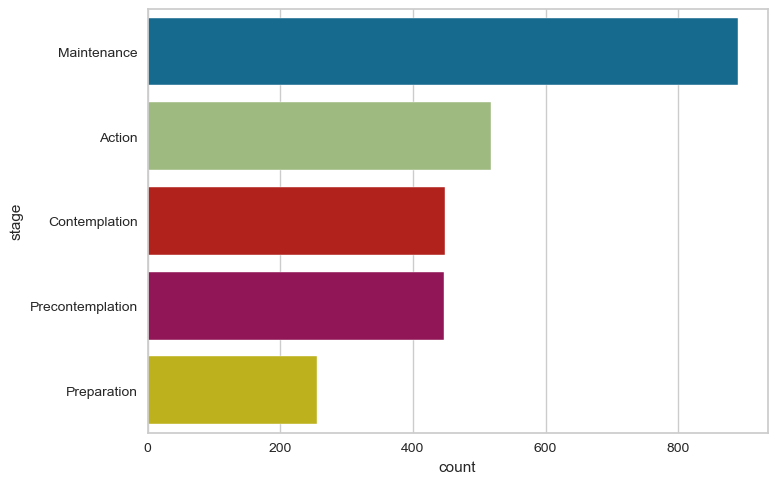

In [5]:
sns.countplot(y="stage", data=train_data)

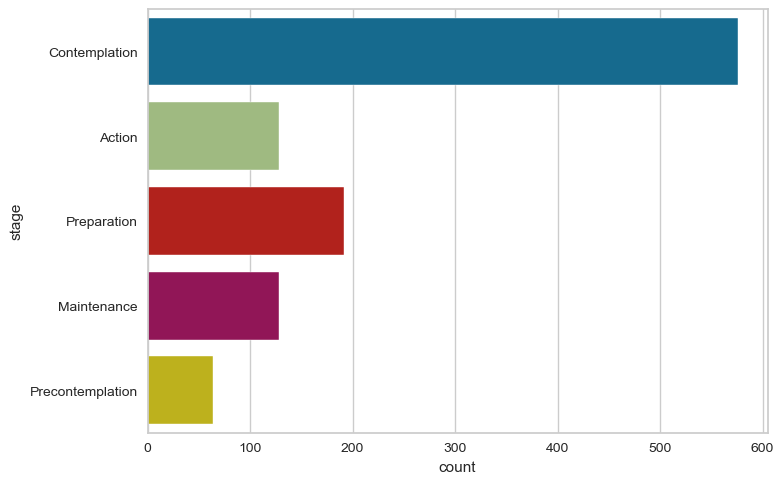

In [6]:
sns.countplot(y="stage", data=test_data)

In [7]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [8]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,"Action: 0, Contemplation: 1, Maintenance: 2, Precontemplation: 3, Preparation: 4"
4,Original Data,"(2559, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.3508,0.3333,0.2167,0.1341,0.1915,0.0000,0.0000,0.0200
lr,Logistic Regression,0.3060,0.3706,0.2221,0.1732,0.2124,0.0285,0.0301,1.9233
qda,Quadratic Discriminant Analysis,0.2616,0.3558,0.2056,0.2363,0.2272,0.0252,0.0265,0.0900
svm,SVM - Linear Kernel,0.2249,0.0000,0.2167,0.0506,0.0826,0.0000,0.0000,0.0967
dt,Decision Tree Classifier,0.2197,0.3333,0.1623,0.2456,0.2213,0.0058,0.0056,0.0400
rf,Random Forest Classifier,0.2197,0.3383,0.1717,0.2538,0.2013,0.0047,0.0071,0.2633
lightgbm,Light Gradient Boosting Machine,0.2161,0.3459,0.1355,0.2021,0.1998,-0.0200,-0.0215,0.8467
ada,Ada Boost Classifier,0.2072,0.3561,0.1688,0.2185,0.1909,0.0028,0.0028,0.1900
gbc,Gradient Boosting Classifier,0.2053,0.3439,0.1650,0.2155,0.1810,0.0011,0.0017,2.4467
ridge,Ridge Classifier,0.2038,0.0000,0.1913,0.2854,0.2102,-0.0191,-0.0202,0.0333


In [17]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

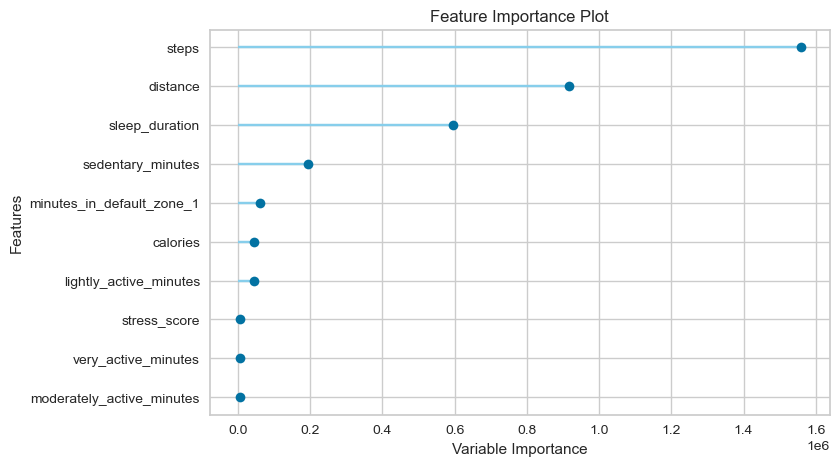

In [18]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [20]:
data = pd.read_pickle('data/fitbit_breq_to_model.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,breq_self_determination
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,identified_regulation
3579,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,identified_regulation
3580,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,identified_regulation
3581,621e339967b776a240e502de,2022-01-16,34.406884,51.533,45.322,94.5,11.6,73.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,identified_regulation


In [21]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

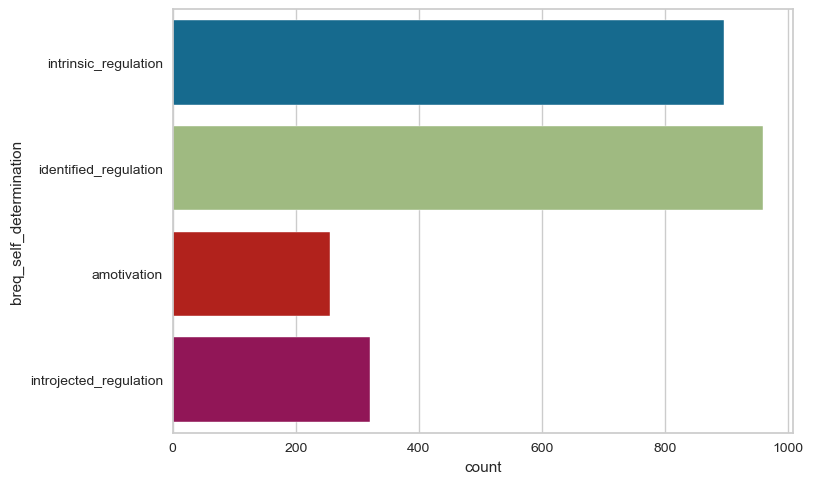

In [22]:
sns.countplot(y="breq_self_determination", data=train_data)

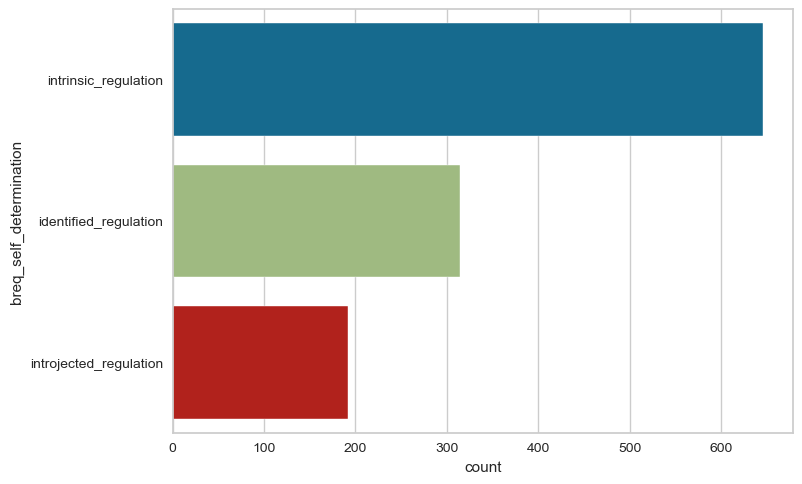

In [24]:
sns.countplot(y="breq_self_determination", data=test_data)

In [25]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [26]:
s = setup(data=train_data, target='breq_self_determination', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,breq_self_determination
2,Target Type,Multiclass
3,Label Encoded,"amotivation: 0, identified_regulation: 1, intrinsic_regulation: 2, introjected_regulation: 3"
4,Original Data,"(2431, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
best = compare_models(errors="raise")

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:28:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [15]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

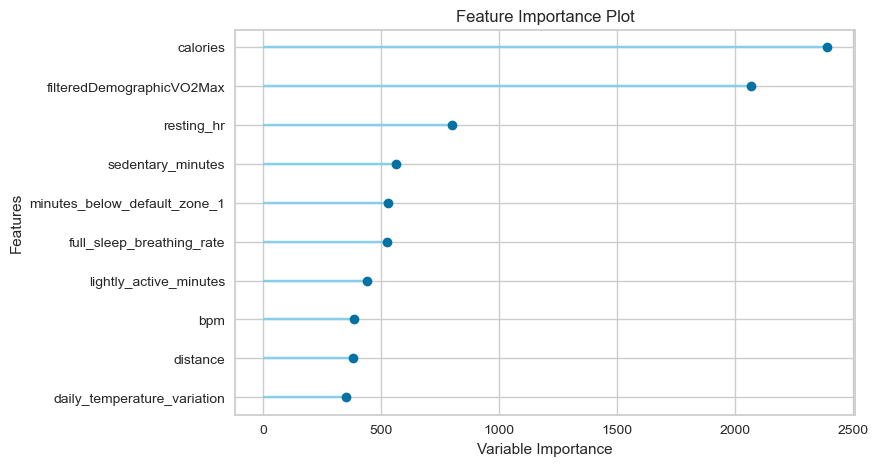

In [16]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [17]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Treadmill,Walk,Weights,Workout,Yoga/Pilates,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3451,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,...,NaN,NaN,NaN,NaN,NaN,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3452,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,...,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3453,621e339967b776a240e502de,2022-01-16,34.406884,51.533,45.322,94.5,11.6,73.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE


predict extraversion

In [18]:
data = data.drop(columns=['date', 'id', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,ipip_extraversion_category
0,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW
1,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW
2,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW
3,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW
4,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,0.966667,-1.793898,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVERAGE
3451,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,0.833333,-0.705708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AVERAGE
3452,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,0.833333,-1.229213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVERAGE
3453,34.406884,51.533,45.322,94.5,11.6,73.0,0.700000,0.725,0.766667,-1.643875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVERAGE


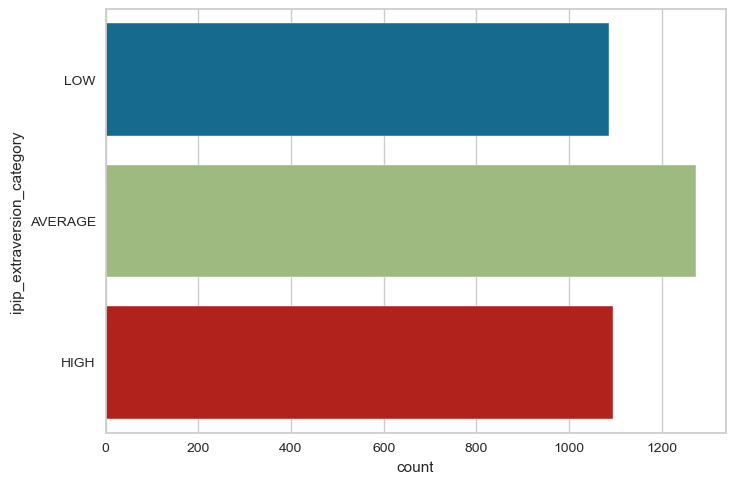

In [19]:
sns.countplot(y="ipip_extraversion_category", data=data)

In [20]:
s = setup(data=data, target='ipip_extraversion_category', silent=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(3455, 55)"
5,Missing Values,True
6,Numeric Features,34
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9173,0.9842,0.9176,0.9183,0.9173,0.8756,0.8761,0.3200
gbc,Gradient Boosting Classifier,0.8933,0.9743,0.8929,0.8949,0.8935,0.8394,0.8399,1.3840
rf,Random Forest Classifier,0.8838,0.9579,0.8835,0.8855,0.8839,0.8250,0.8257,0.2110
et,Extra Trees Classifier,0.8491,0.9335,0.8482,0.8507,0.8489,0.7727,0.7736,0.1880
dt,Decision Tree Classifier,0.8462,0.8894,0.8466,0.8468,0.8458,0.7687,0.7693,0.0250
ada,Ada Boost Classifier,0.6952,0.8440,0.6998,0.7058,0.6949,0.5435,0.5482,0.1360
ridge,Ridge Classifier,0.5972,0.0000,0.5937,0.6025,0.5963,0.3918,0.3941,0.0200
lda,Linear Discriminant Analysis,0.5947,0.7734,0.5916,0.6010,0.5939,0.3882,0.3907,0.0300
knn,K Neighbors Classifier,0.5124,0.6983,0.5081,0.5188,0.5101,0.2619,0.2649,0.0300
nb,Naive Bayes,0.4562,0.6405,0.4641,0.4685,0.4417,0.1914,0.1997,0.0100


In [22]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

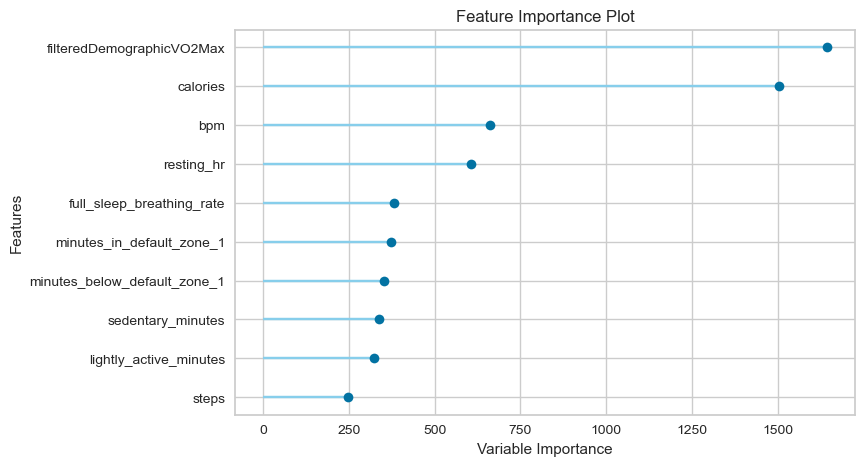

In [23]:
plot_model(best, plot='feature')

predict agreeableness

In [ ]:
data = data.drop(columns=['filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data = data.drop(columns=['date', 'id', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_agreeableness_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_agreeableness_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict conscientiousness

In [ ]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data = data.drop(columns=['date', 'id', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_conscientiousness_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_conscientiousness_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict stability

In [ ]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
data = data.drop(columns=['date', 'id', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_stability_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_stability_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict intellect

In [ ]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
data = data.drop(columns=['date', 'id', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_intellect_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_intellect_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')